# Simple EDA on IRIS Dataset

# Name:Vaibhavi Patki

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
#reading csv file
df = pd.read_csv('D:\Vaibhavi\Data science\Project1\Iris.csv')

In [5]:
#datatypes of columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#shape of dataset
df.shape

(150, 6)

In [8]:
#statistical summary of dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#checking missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [24]:
#checking duplicates
data = df.drop_duplicates(subset ="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [11]:
#checking values in dataset are balanaced or not
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


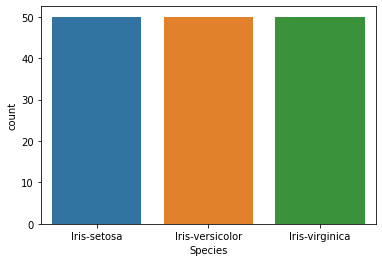

In [12]:
#data visulization
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.countplot(x='Species', data=df, )
plt.show()

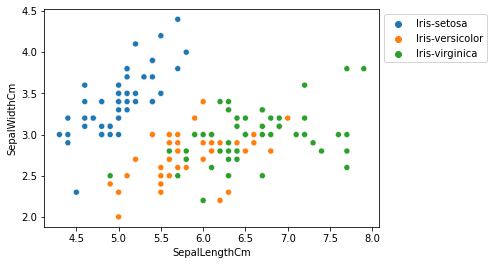

In [14]:
#Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

In [15]:
#Species Setosa has smaller sepal lengths but larger sepal widths.
#Versicolor Species lies in the middle of the other two species in terms of sepal length and width
#Species Virginica has larger sepal lengths but smaller sepal widths.

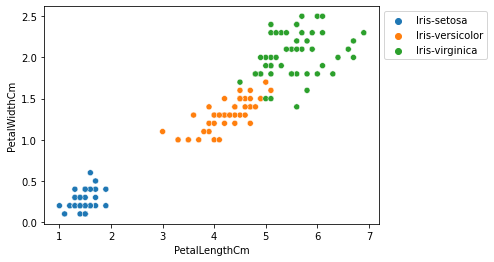

In [16]:
#Comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

In [17]:
#Species Setosa has smaller petal lengths and widths.
#Versicolor Species lies in the middle of the other two species in terms of petal length and width
#Species Virginica has the largest of petal lengths and widths.

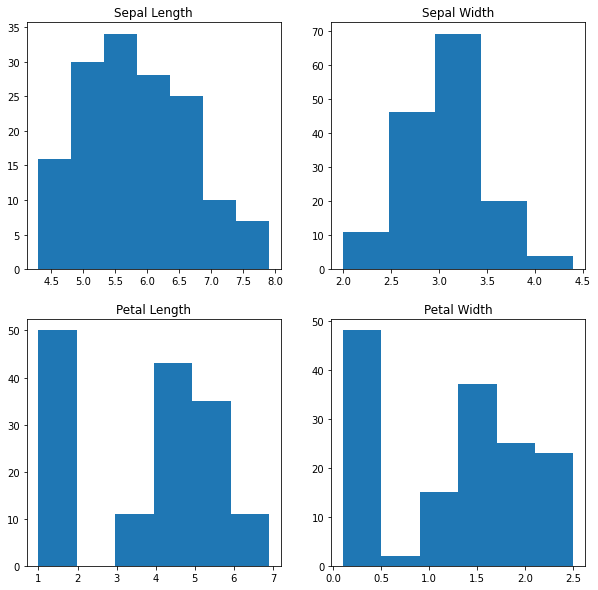

In [18]:
#histograms
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

In [19]:
#handling corelation
data.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.624413,-0.654654,0.969909,0.999685
SepalLengthCm,0.624413,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.969909,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.999685,0.643817,-0.673417,0.975713,1.000000


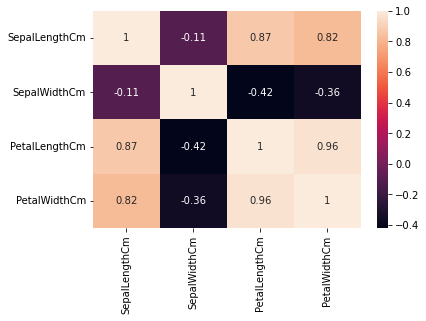

In [21]:
#heatmaps
sns.heatmap(df.corr(method='pearson').drop(
  ['Id'], axis=1).drop(['Id'], axis=0),
            annot = True);
 
plt.show()

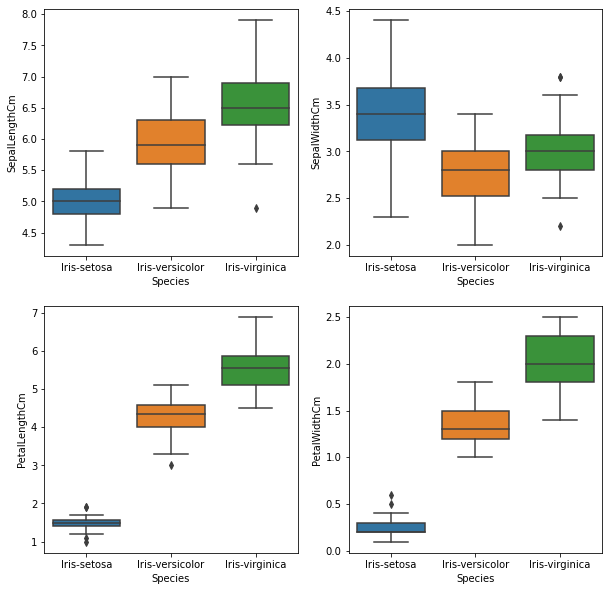

In [22]:
#boxplots
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
 
plt.subplot(222)
graph('SepalWidthCm')
 
plt.subplot(223)
graph('PetalLengthCm')
 
plt.subplot(224)
graph('PetalWidthCm')
 
plt.show()